# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [65]:
# Import Required Libraries
# %pip install numpy==1.26.4
# %pip install --upgrade pandas tensorflow scikit-learn
# %pip uninstall scipy scikit-learn -y
# %pip install --no-cache-dir scipy scikit-learn
# %pip uninstall gensim scipy -y
# %pip install scipy==1.13.0 gensim==4.3.3
# %pip install seaborn --upgrade


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import seaborn as sns
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [66]:
# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0.1,Unnamed: 0,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,weekday
0,0,0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1,3
1,1,1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,1,0,4
2,2,2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,1,5
3,3,3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0,1,6
4,4,4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,1,0,0


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [67]:
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
print("Missing values in each column before handling:\n", df.isnull().sum())

# Option 1: Forward fill followed by backward fill
df_cleaned = df.ffill().bfill()

# Option 2: Impute missing values using bfill
df_imputed = df.copy()

# Fill numerical columns using backward fill
numeric_columns = df_imputed.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df_imputed[numeric_columns].bfill()

# Fill categorical columns using backward fill
categorical_columns = df_imputed.select_dtypes(include=['object']).columns
df_imputed[categorical_columns] = df_imputed[categorical_columns].bfill()

# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display results
print("Missing values after handling:\n", df_imputed.isnull().sum())
print("Cleaned DataFrame:\n", df_cleaned.head())
print("Imputed DataFrame:\n", df_imputed.head())



Missing values in each column before handling:
 Unnamed: 0.1       0
Unnamed: 0         0
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
weekday            0
dtype: int64
Missing values after handling:
 Unnamed: 0.1       0
Unnamed: 0         0
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
weekday            0
dtype: int64
Cleaned DataFrame:
    Unnamed: 0.1  Unnamed: 0        date      demand        RRP  \
0             0           0  2015-01-01   99635.030  25.633696   
1             1           1 

# DEMAND ANALYSIS AND PRICE ANALYSIS


## DAILY DEMAND ANALYSIS

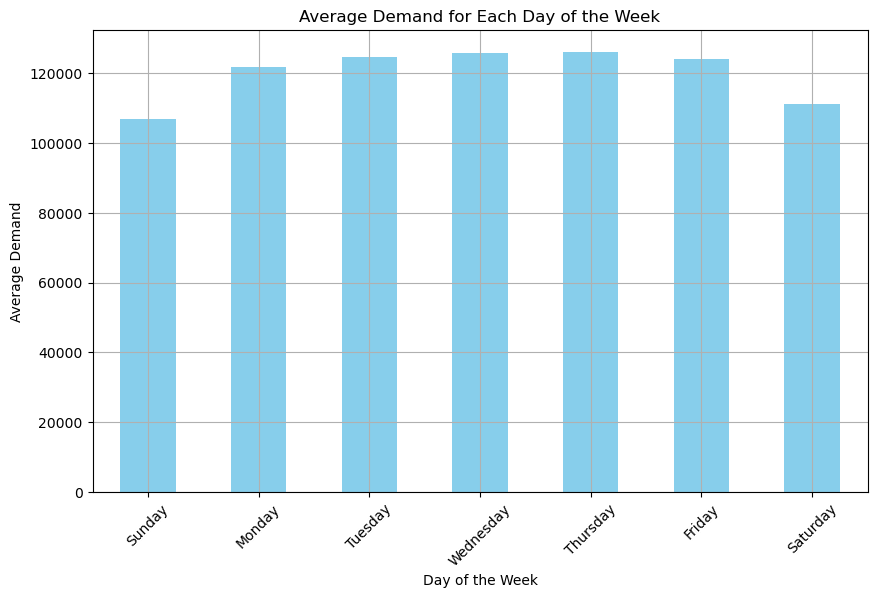

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [68]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


## Weekly Demand Variations

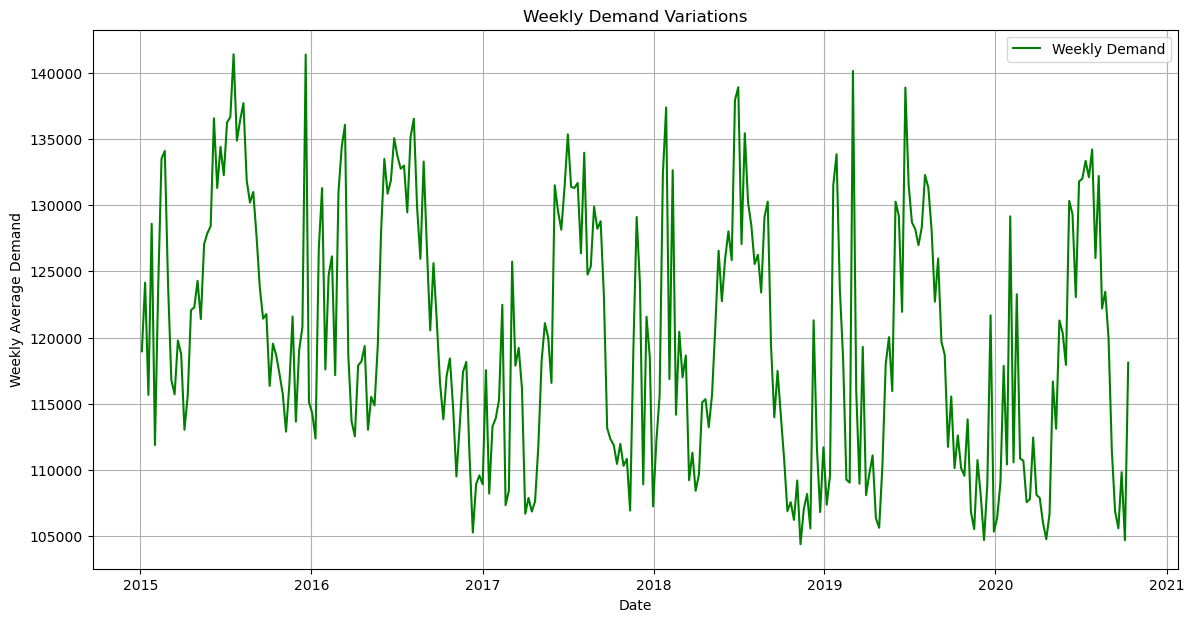

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [69]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

## Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_22092\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


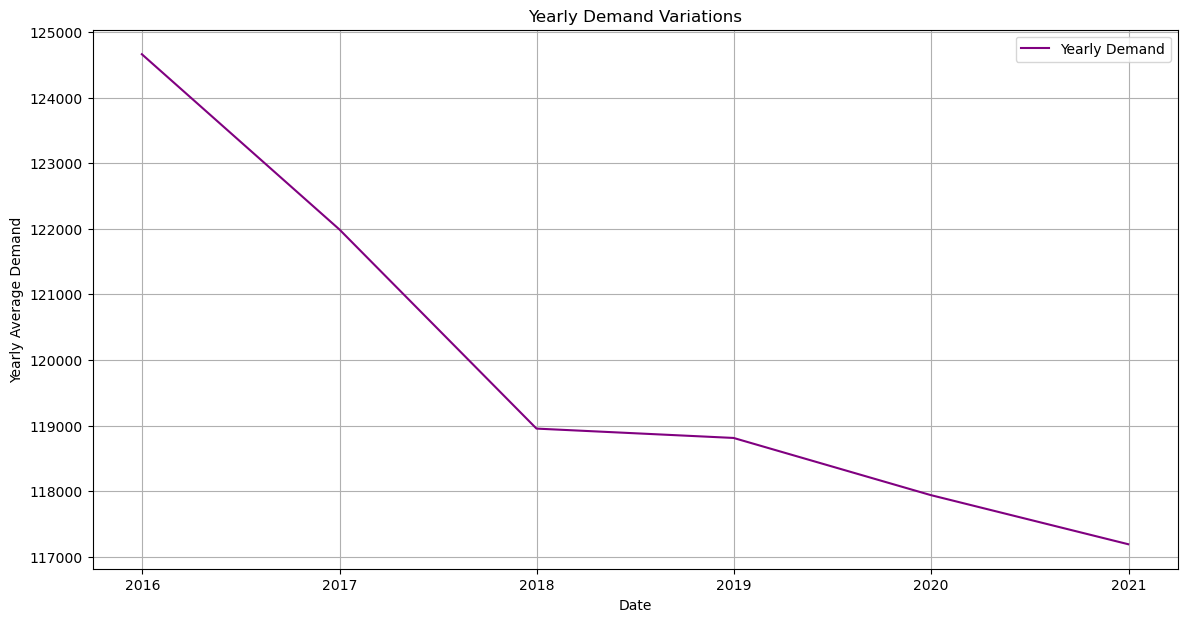

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [70]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


## Demand vs. RRP Relationship

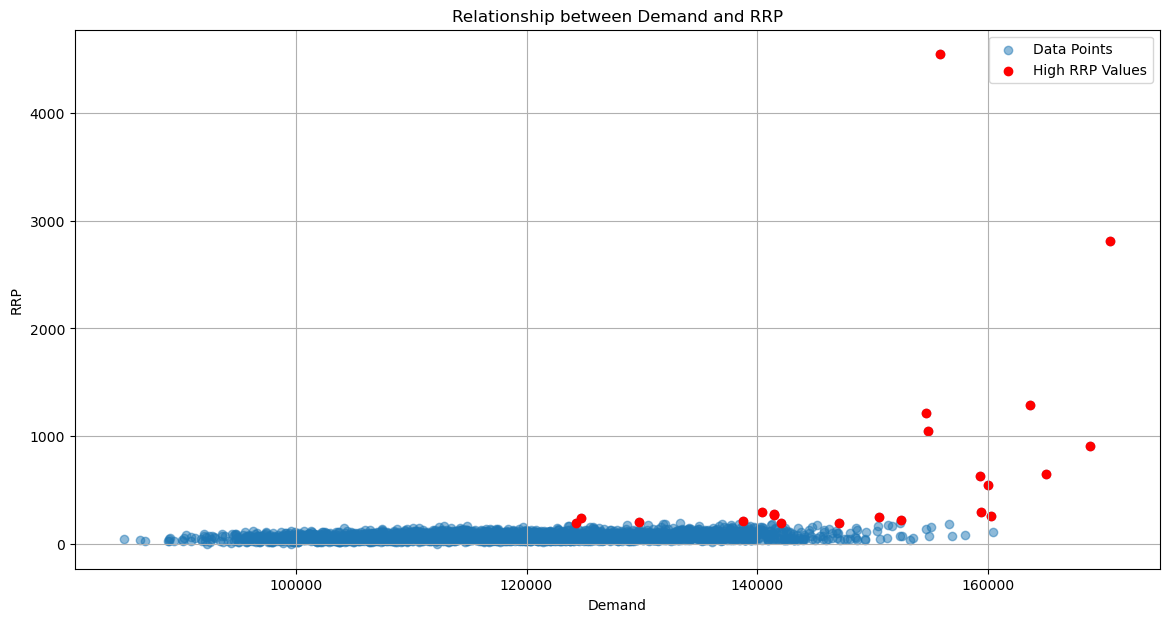

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [71]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


## Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_22092\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


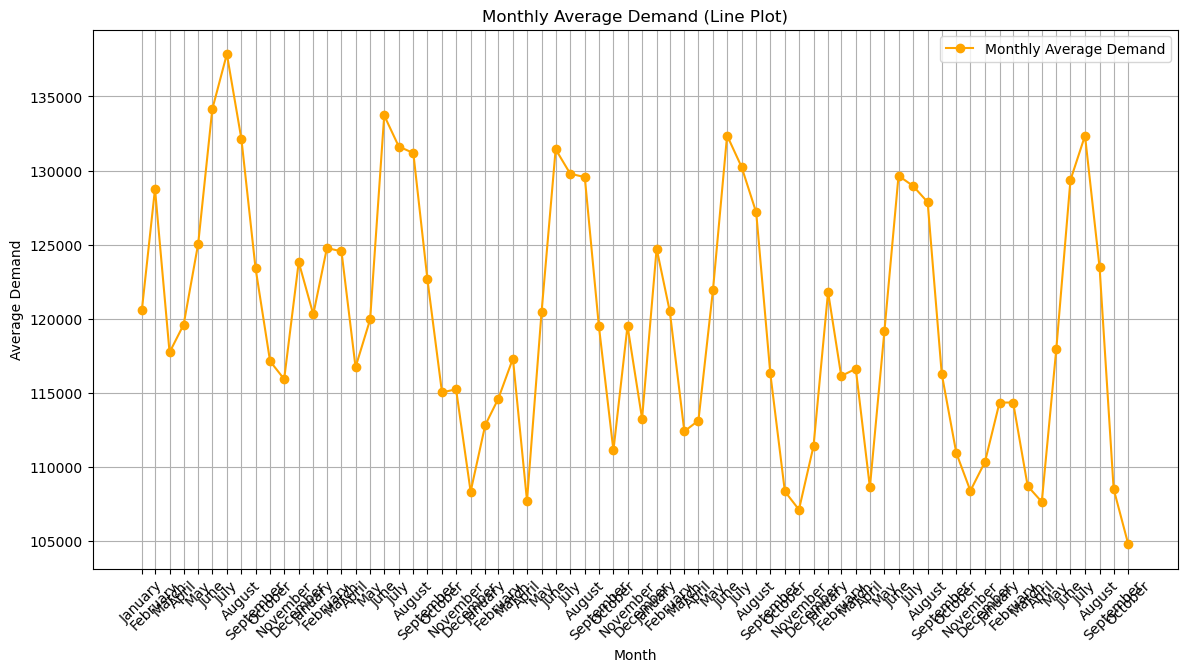

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [72]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

## High Demand and Price Spikes

In [73]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
            Unnamed: 0.1  Unnamed: 0      demand          RRP  demand_pos_RRP  \
date                                                                            
2015-12-17           350         350  152366.300   188.086125      152366.300   
2016-01-13           377         377  160011.075   545.737820      160011.075   
2016-03-08           432         432  160285.015   253.032032      160285.015   
2016-07-05           551         551  142401.795   147.187692      142401.795   
2017-02-08           769         769  142213.660   135.061279      142213.660   
2017-02-09           770         770  155060.610   156.699561      151642.620   
2017-08-03           945         945  151355.430   169.233827      151355.430   
2017-11-29          1063        1063  151730.950   166.552647      151730.950   
2018-01-18          1113        1113  154648.065  1210.137920      154648.065   
2018-01-19          1114        1114  165070.595   647

# Weather Impact Analysis
### 1. Importing Required Libraries

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

### 2. Setting Visualization Style

In [75]:
sns.set(style="whitegrid", palette="pastel")

### 3. Removing Extreme Outliers (Excluding Rainfall)

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df_cleaned = df.ffill().bfill()  # Forward fill followed by backward fill

# Function to remove outliers using IQR, excluding "rainfall"
def remove_outliers_iqr(data, exclude_column):
    num_data = data.select_dtypes(include=['number'])  # Select only numerical columns
    if exclude_column in num_data.columns:
        num_data = num_data.drop(columns=[exclude_column])  # Drop "rainfall" from outlier detection

    Q1 = num_data.quantile(0.25)
    Q3 = num_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mask to keep only rows where all numerical values (except "rainfall") are within bounds
    mask = ~((num_data < lower_bound) | (num_data > upper_bound)).any(axis=1)
    
    return data[mask]  # Return the filtered dataset

# Remove outliers except for "rainfall"
df_no_outliers = remove_outliers_iqr(df_cleaned, "rainfall")

# Fill missing values after outlier removal
df_no_outliers = df_no_outliers.bfill()

# Encode Categorical Variables
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

# Display results
print("Missing values after handling:\n", df_no_outliers.isnull().sum())
print("Dataset after removing outliers (except for rainfall):\n", df_no_outliers.head())


Missing values after handling:
 Unnamed: 0.1       0
Unnamed: 0         0
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
weekday            0
dtype: int64
Dataset after removing outliers (except for rainfall):
    Unnamed: 0.1  Unnamed: 0  date      demand        RRP  demand_pos_RRP  \
3             3           3     0  104330.715  25.005560      104330.715   
4             4           4     1  118132.200  26.724176      118132.200   
5             5           5     2  130672.485  31.282311      130672.485   
7             7           7     3  142015.655  49.117280      142015.655   
8             8           8     4  121801.155  34.490675      121801.155   

   RRP_positive  demand_neg_RRP  RRP_negative  frac_at_neg_RRP  \
3     25.005560    

### 4. Outlier Removal for Numerical Variables

In [77]:
import pandas as pd

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Define numerical variables
numerical_vars = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Function to remove extreme outliers using the IQR method
def remove_extreme_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove extreme outliers except for "rainfall"
filtered_vars = [var for var in numerical_vars if var != 'rainfall' and df[var].nunique() > 10]
df_cleaned = remove_extreme_outliers(df, filtered_vars)

# Save the cleaned dataset
cleaned_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv


### 5. Visualizing Data Distributions

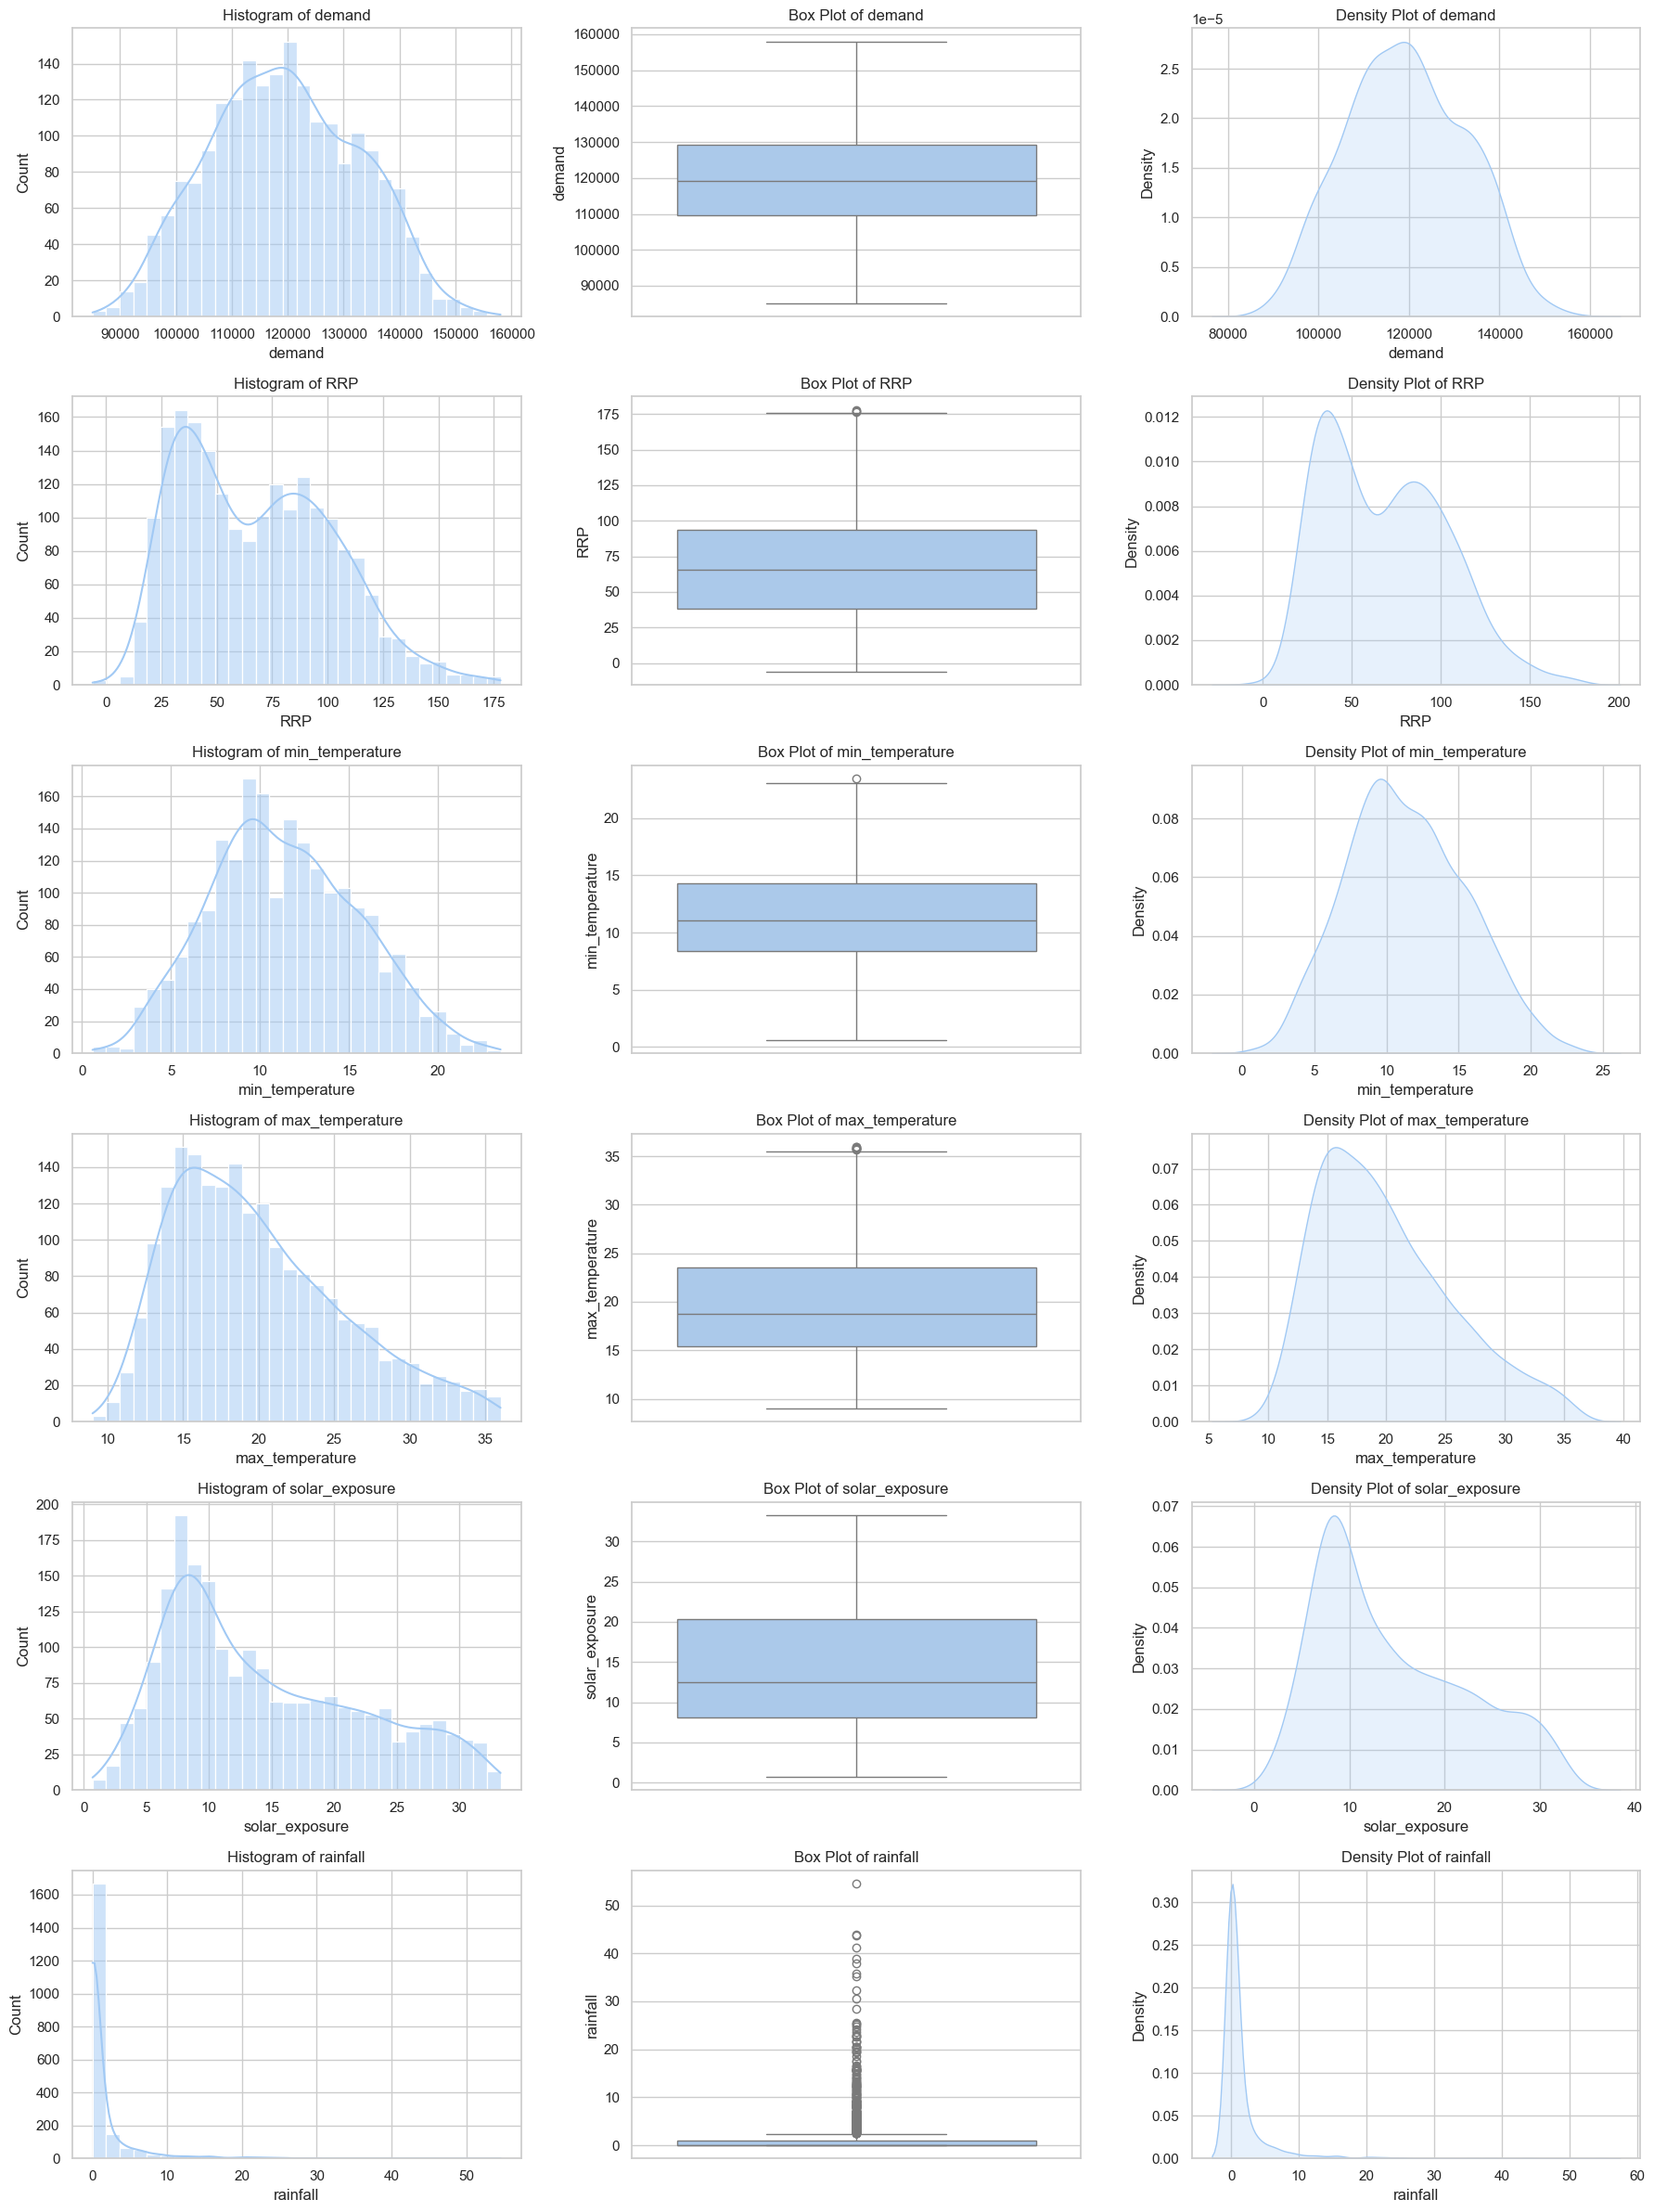

In [78]:
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(18, 4 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df_cleaned[var].dropna(), bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Box Plot
    sns.boxplot(y=df_cleaned[var].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    
    # KDE Density Plot (only if sufficient unique values exist)
    if df_cleaned[var].nunique() > 1:
        sns.kdeplot(df_cleaned[var].dropna(), fill=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {var}')
    else:
        axes[i, 2].set_title(f'Insufficient Data for KDE: {var}')

plt.tight_layout()
plt.show()

### 6. Categorical Variable Analysis

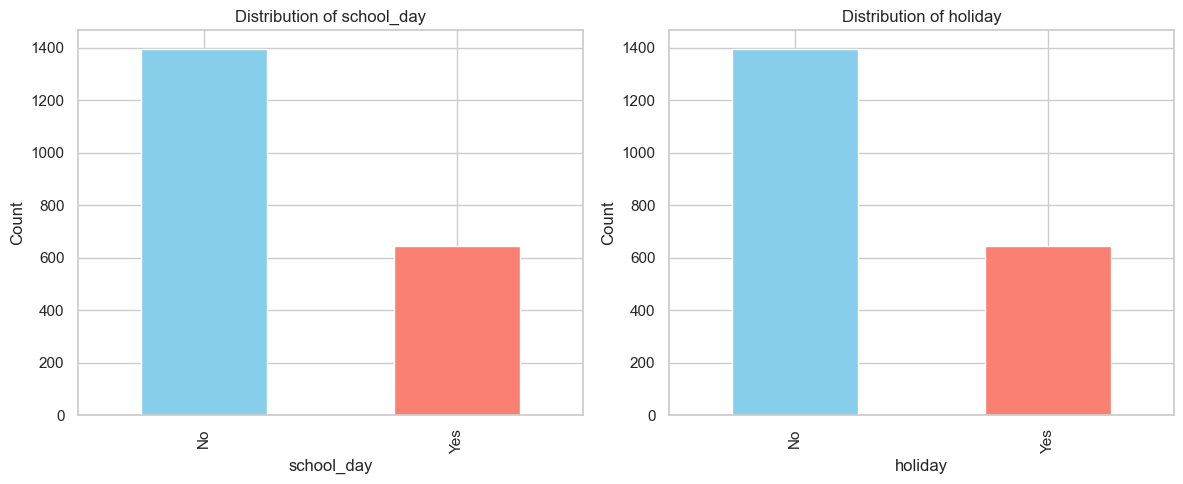

In [79]:
# Categorical Variables
categorical_vars = ['school_day', 'holiday']
fig, ax = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

for i, var in enumerate(categorical_vars):
    df_cleaned[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}')
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Count')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### 7. Correlation Heatmap (Demand vs. Weather Factors)

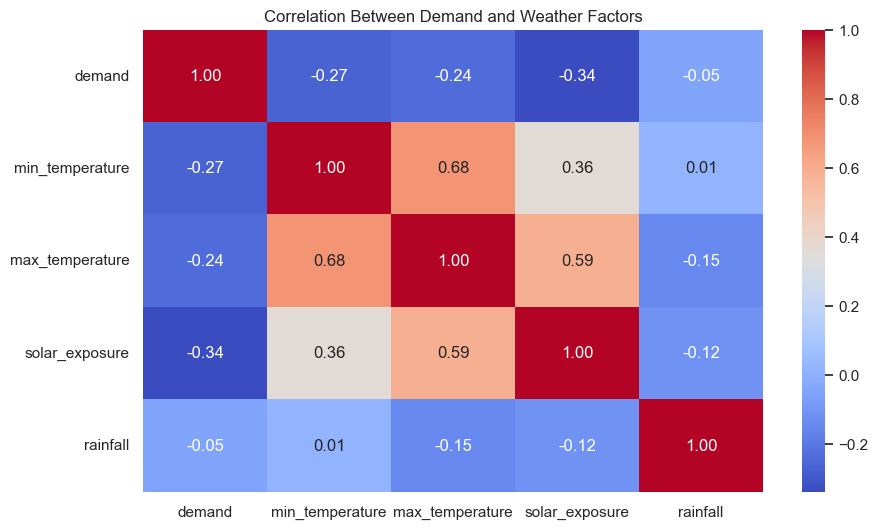

In [80]:
# Weather Impact Analysis
# Correlation Heatmap
df_weather = df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


### 8. Scatter Plots (Demand vs. Weather Factors)

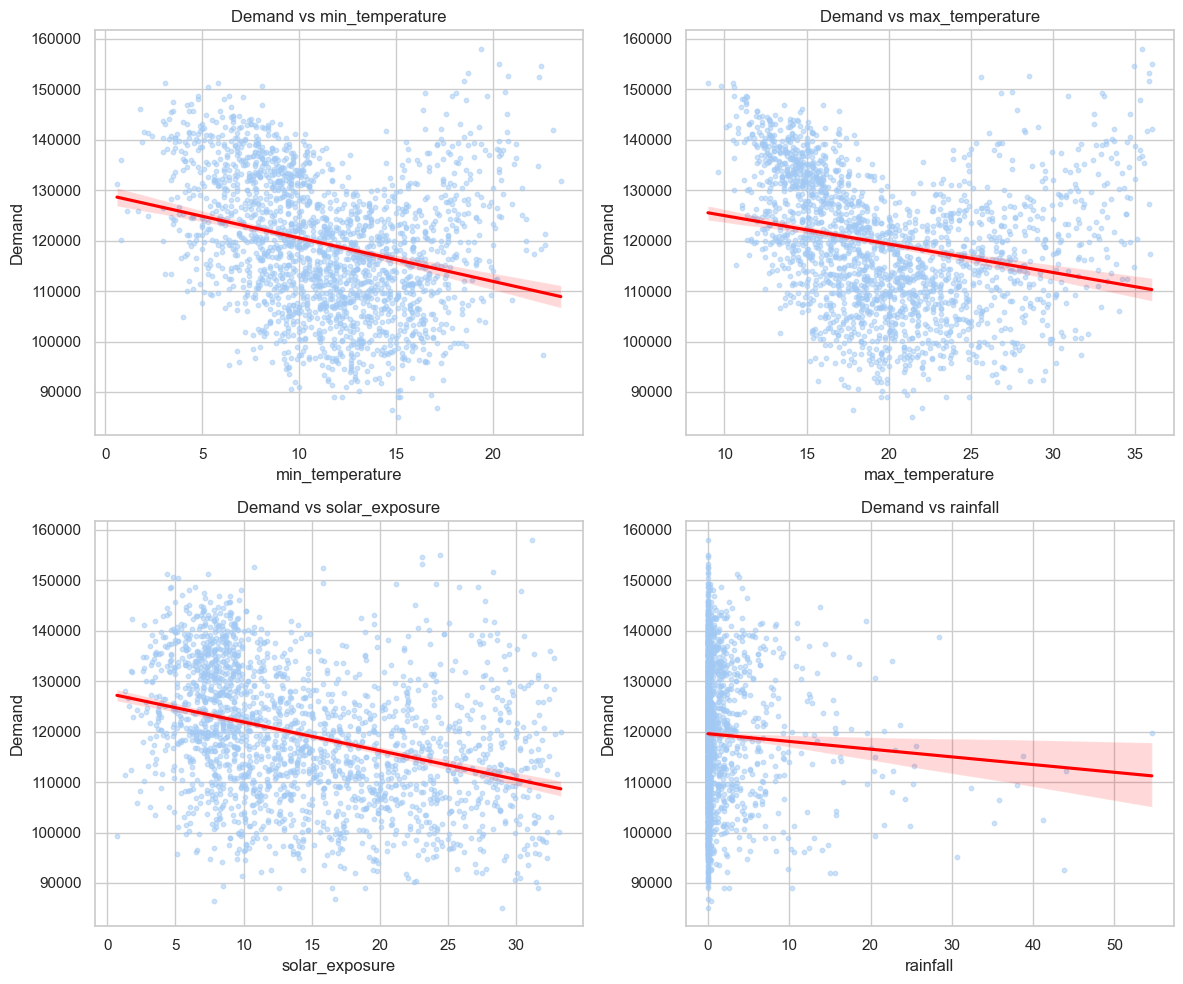

In [81]:
# Scatter Plots with Regression Lines
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    valid_data = df_cleaned[[var, 'demand']].dropna()
    if not valid_data.empty:
        sns.regplot(x=valid_data[var], y=valid_data['demand'], ax=axes[i], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
    axes[i].set_title(f'Demand vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

### 9. Season Classification

In [82]:
# First convert the index to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)


# Now extract month and assign seasons
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Rest of your code remains the same
# Check if all seasons exist
print("Unique Seasons:", df_cleaned['season'].unique())
print("Season Counts:\n", df_cleaned['season'].value_counts())

# Check month distribution
print("Month Counts:\n", df_cleaned['month'].value_counts())

Unique Seasons: ['Summer' 'Autumn' 'Winter' 'Spring']
Season Counts:
 season
Winter    549
Autumn    547
Spring    489
Summer    458
Name: count, dtype: int64
Month Counts:
 month
5     186
7     186
8     184
3     181
4     180
6     179
9     179
2     163
10    161
1     160
11    149
12    135
Name: count, dtype: int64


### 10. Electricity Demand by Season

C:\Users\saina\AppData\Local\Temp\ipykernel_22092\1907489123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='demand', data=df_cleaned,


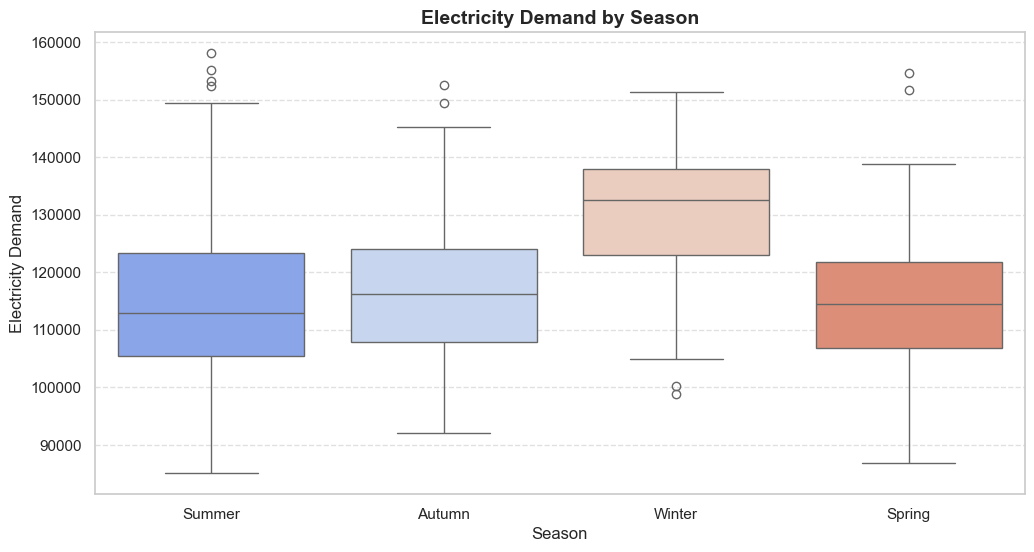

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand', data=df_cleaned, 
            order=['Summer', 'Autumn', 'Winter', 'Spring'], 
            palette='coolwarm')

plt.title('Electricity Demand by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Electricity Demand', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##  To analyze Operational Efficiency & Special Event Impact, we need to:

### 1️⃣ Study How Holidays & School Days 


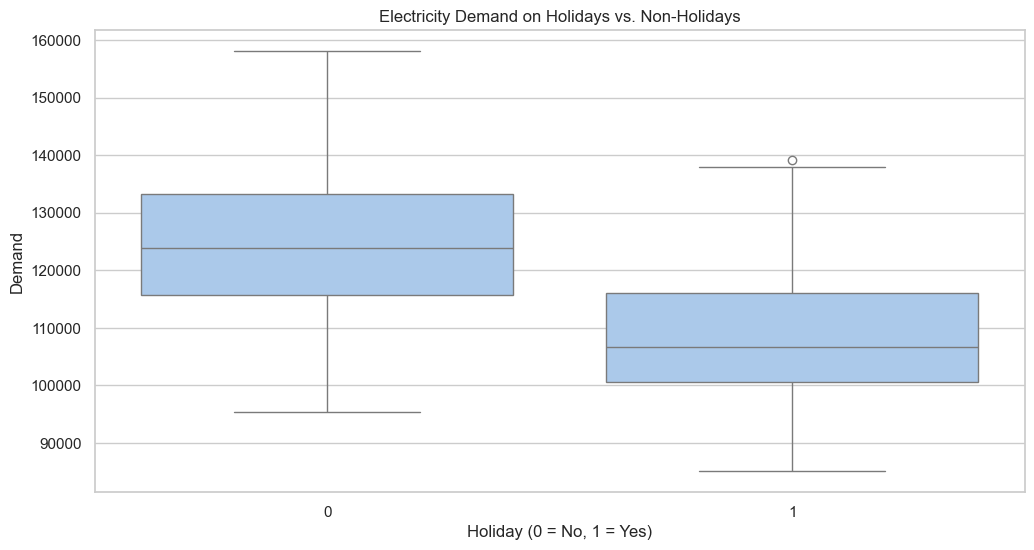

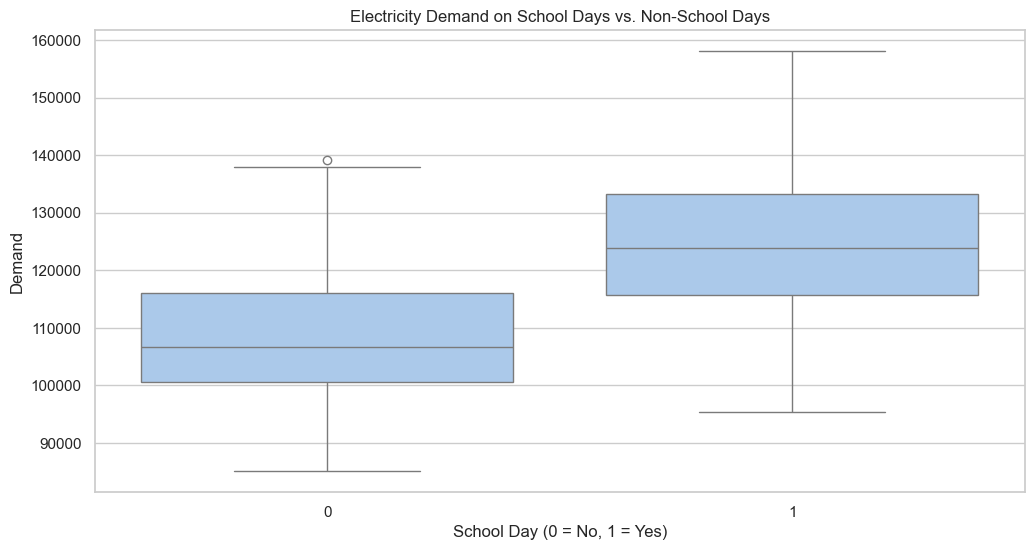

In [84]:
# Impact of Holidays and School Days on Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='demand', data=df_cleaned)
plt.title('Electricity Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', data=df_cleaned)
plt.title('Electricity Demand on School Days vs. Non-School Days')
plt.xlabel('School Day (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

# Anomaly Detection in Electricity Demand
### 1. Ensuring Date Index Format

In [85]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Detecting Anomalies Using Z-Score

In [86]:
# Compute Z-score for anomaly detection
df_cleaned['demand_zscore'] = np.abs((df_cleaned['demand'] - df_cleaned['demand'].mean()) / df_cleaned['demand'].std())

# Lower the threshold to detect more anomalies
df_cleaned['is_anomaly'] = df_cleaned['demand_zscore'] > 2.0  # Lowered from 2.5


### 3. Debugging Anomaly Detection

In [87]:
# DEBUG: Print detected anomalies
print(df_cleaned[df_cleaned['is_anomaly']])
print(f"Total anomalies detected: {df_cleaned['is_anomaly'].sum()}")


            Unnamed: 0.1  Unnamed: 0      demand         RRP  demand_pos_RRP  \
date                                                                           
2015-01-21            20          20  148702.505   34.443415      148702.505   
2015-01-22            21          21  153232.100   35.230761      153232.100   
2015-02-10            40          40  145948.565   37.522600      145948.565   
2015-02-11            41          41  149322.850   32.655454      149322.850   
2015-06-02           152         152  148534.505   59.856033      148534.505   
2015-06-03           153         153  146902.950   50.562684      146902.950   
2015-06-04           154         154  147155.265   33.050285      147155.265   
2015-07-14           194         194  150671.105   45.255583      150671.105   
2015-07-15           195         195  151270.540   50.497418      151270.540   
2015-07-20           200         200  146154.370   41.796713      146154.370   
2015-08-04           215         215  14

### 4. Visualizing Electricity Demand with Anomalies Highlighted

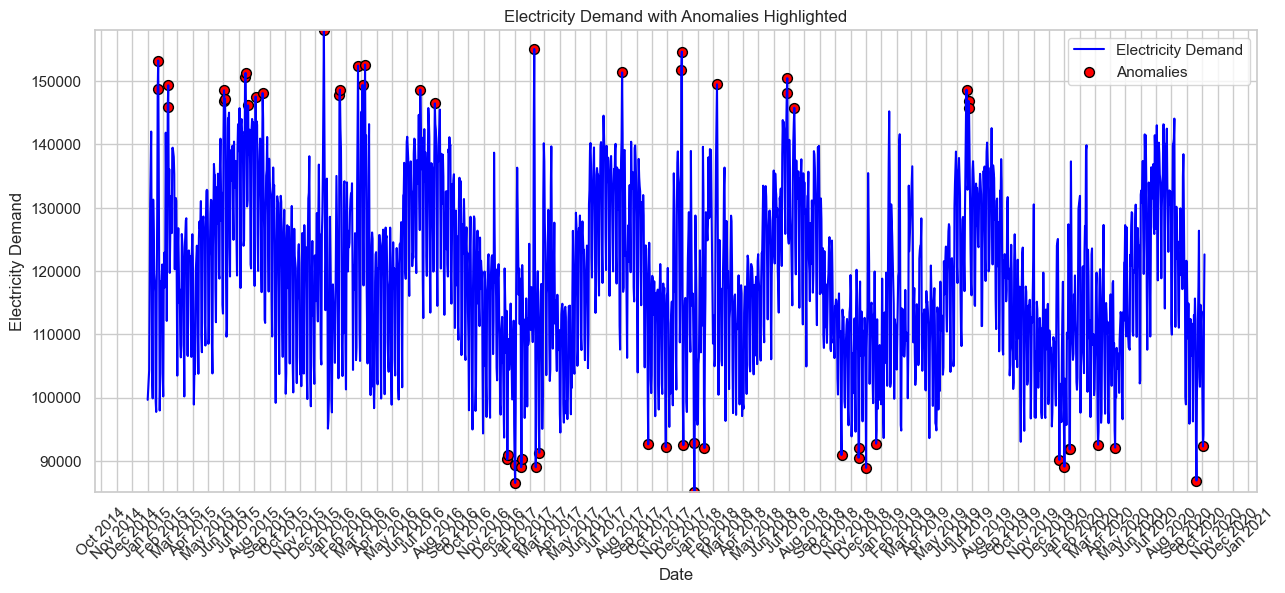

In [88]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df_cleaned.index, df_cleaned['demand'], label='Electricity Demand', color='blue')

# Highlight anomalies if any exist
anomalies = df_cleaned[df_cleaned['is_anomaly']]
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies['demand'], color='red', label='Anomalies', s=50, edgecolors='black')

# Formatting the x-axis for seasonality
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand with Anomalies Highlighted')
plt.legend()

# Ensure all months are displayed on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

# Adjust Y-limits dynamically
plt.ylim(df_cleaned['demand'].min() - 10, df_cleaned['demand'].max() + 10)

plt.grid(True)
plt.show()

### 5. Revenue and Cost Optimization

C:\Users\saina\AppData\Local\Temp\ipykernel_22092\171858415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')


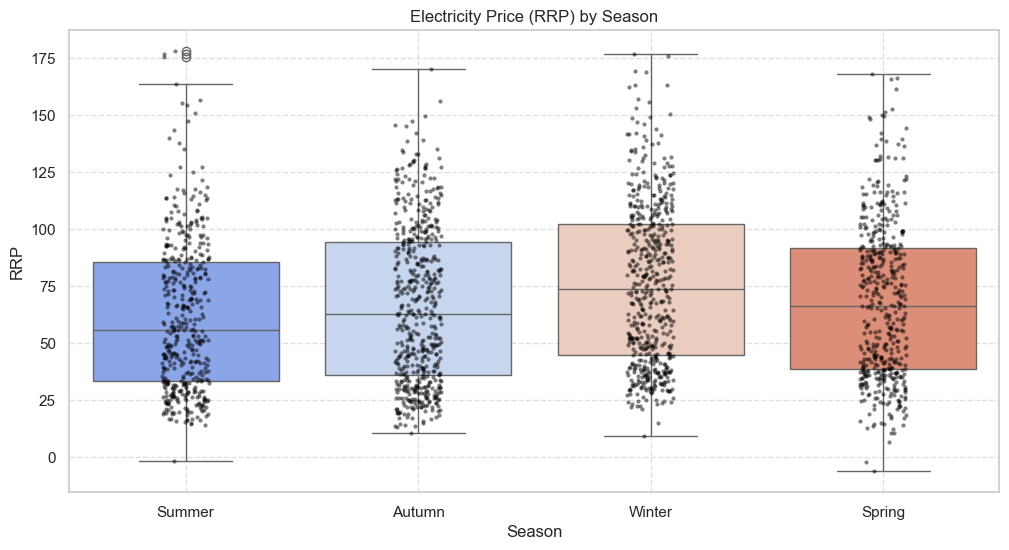

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')
sns.stripplot(x='season', y='RRP', data=df_cleaned, color="black", alpha=0.5, size=3, jitter=True)
plt.title('Electricity Price (RRP) by Season')
plt.xlabel('Season')
plt.ylabel('RRP')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Electricity RRP Analysis with Negative RRP Periods Highlighted

### 1. Convert Index to DateTime

In [90]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Extract Unique Years from Dataset

In [91]:
unique_years = sorted(df_cleaned.index.year.unique())

### 3. Plotting RRP Over Time & Highlighting Negative RRP Periods

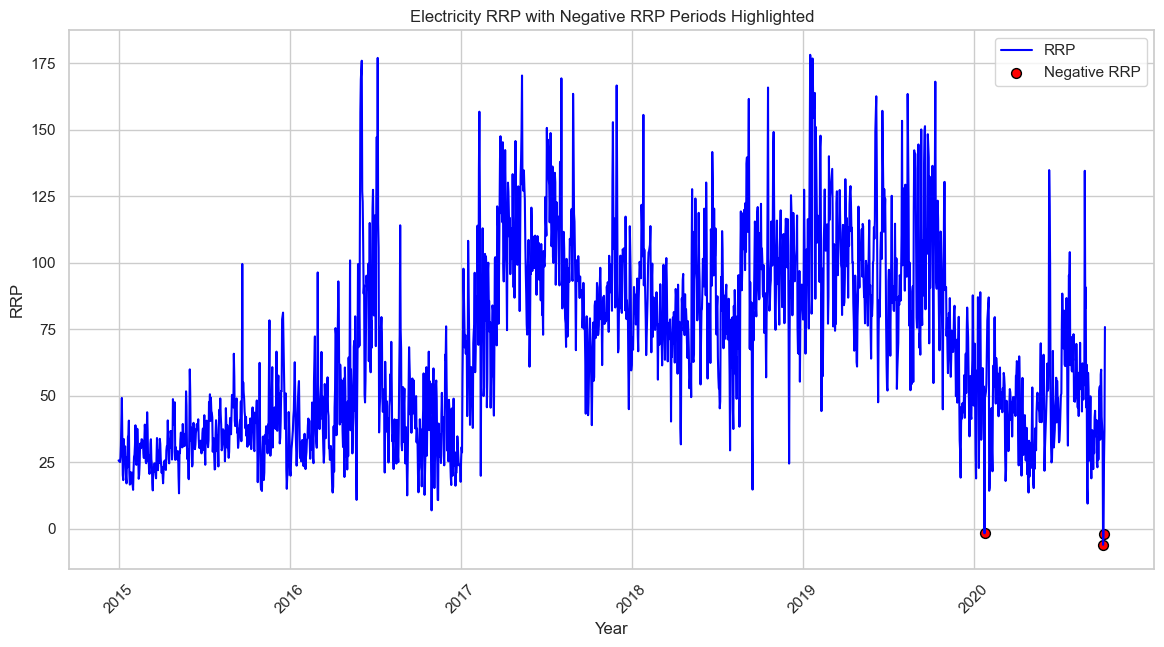

In [92]:
# Plot RRP, highlighting periods with negative RRP
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['RRP'], label='RRP', color='blue')

# Highlight negative RRP periods
negative_rrp = df_cleaned[df_cleaned['RRP'] < 0]
plt.scatter(negative_rrp.index, negative_rrp['RRP'], color='red', label='Negative RRP', s=50, edgecolors='black')
plt.title('Electricity RRP with Negative RRP Periods Highlighted')
plt.xlabel('Year')
plt.ylabel('RRP')

# **Ensure all years are shown on the x-axis**
plt.xticks(
    ticks=[pd.Timestamp(f"{year}-01-01") for year in unique_years],  # Explicitly set all years
    labels=unique_years,
    rotation=45
)

# Optionally, use major tick formatting for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.grid(True)
plt.show()


# Summary of Insights and Recommendations
## Strategies for Revenue and Cost Efficiency:
### Adaptive Pricing & Flexible Demand:

#### 1.Implement adaptive pricing to balance supply and demand.

**Encourage usage during low-cost periods with flexible demand programs.**

**Offer incentives for reducing consumption during peak times.**

**Impact: Balances grid load, reduces costs, and stabilizes the system.**

#### 2.Energy Storage Solutions:

**Invest in technologies to store excess energy during off-peak times.**

**Store renewable energy when generation is high and demand is low.**

**Discharge stored energy during high-demand periods to stabilize prices.**

### Impact: Reduces reliance on non-renewable sources, lowers costs, and increases energy security.

#### 3.Smart Infrastructure & Predictive Maintenance:

**Develop and deploy smart grid technologies for real-time monitoring and control.**

**Use AI and machine learning for accurate demand forecasting.**

**Implement predictive maintenance to prevent critical failures.**

### Impact: Enhances efficiency, reduces operational costs, and ensures grid reliability.

#### 4.Balanced Energy Portfolio:

**Promote a diverse energy mix including renewables, hydro, and flexible sources like natural gas.**

**Support policies to encourage investment in various energy sources.**

### Impact: Enhances energy security, reduces emissions, and stabilizes the energy system.

### Readiness for Forecasting & Data Preparation:
#### 5.Essential Features:

**Time-based variables: Include day, week, hour to capture demand patterns.**

**Historical demand: Use past demand data for future predictions.**

**Weather conditions: Factor in temperature, humidity, etc.**

**Special events: Include holidays and events that impact demand.**

### Impact: Improves forecasting accuracy and relevance.

#### 6.Data Integrity:

**Ensure datasets are complete with no missing values.**

**Clean anomalies and outliers for accurate forecasts.**

### Impact: Increases data reliability, enhancing forecast accuracy.

#### 7.Data Transformation Techniques:

**Normalization & Scaling: Ensure features contribute equally to the model.**

#### 8.Encoding: Convert categorical variables into numerical form.

#### 9.Feature Engineering: Create new features for better insights.

### Impact: Enhances model performance and accuracy.

### These updated insights and recommendations should provide a clear path to optimizing revenue and costs, as well as enhancing forecasting readiness

## LABEL ENCODING FOR SCHOOL DAYS AND HOLIDAY

In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'school_day' and 'holiday' columns
df_cleaned['school_day'] = label_encoder.fit_transform(df_cleaned['school_day'])
df_cleaned['holiday'] = label_encoder.fit_transform(df_cleaned['holiday'])

# Save the updated dataset back to the CSV file
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)

print(df_cleaned.head())

   Unnamed: 0.1  Unnamed: 0        date      demand        RRP  \
0             0           0  2015-01-01   99635.030  25.633696   
1             3           3  2015-01-04  104330.715  25.005560   
2             4           4  2015-01-05  118132.200  26.724176   
3             5           5  2015-01-06  130672.485  31.282311   
4             7           7  2015-01-08  142015.655  49.117280   

   demand_pos_RRP  RRP_positive  demand_neg_RRP  RRP_negative  \
0       97319.240     26.415953         2315.79         -7.24   
1      104330.715     25.005560            0.00          0.00   
2      118132.200     26.724176            0.00          0.00   
3      130672.485     31.282311            0.00          0.00   
4      142015.655     49.117280            0.00          0.00   

   frac_at_neg_RRP  min_temperature  max_temperature  solar_exposure  \
0         0.020833             13.3             26.9            23.6   
1         0.000000             16.3             21.4            25.2

## APPLYING ONE_HOT ENCODING FOR THE REQUIRED CATEGORICAL COLUMNS

In [94]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Inspect categorical variables (columns with dtype 'object')
categorical_vars = df_cleaned.select_dtypes(include=['object']).columns
print("All categorical variables:", categorical_vars)

# Identify low cardinality categorical columns (e.g., fewer than 10 unique values)
low_cardinality_vars = [col for col in categorical_vars if df_cleaned[col].nunique() < 10]
print("Low cardinality categorical variables:", low_cardinality_vars)

# One-hot encode these low cardinality variables
df_encoded = pd.get_dummies(df_cleaned, columns=low_cardinality_vars, drop_first=True)

print("Columns after one-hot encoding:")
print(df_encoded.columns)

All categorical variables: Index(['date'], dtype='object')
Low cardinality categorical variables: []
Columns after one-hot encoding:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'demand', 'RRP', 'demand_pos_RRP',
       'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP',
       'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall',
       'school_day', 'holiday', 'weekday'],
      dtype='object')


## Datetime Encoding

In [95]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Convert the 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday

# Optional: Cyclical encoding for the month
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Save the updated dataset back to cleaned_dataset.csv
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)
print("Updated cleaned dataset saved to cleaned_dataset.csv")


Updated cleaned dataset saved to cleaned_dataset.csv


##FEATURE ENGINEERING


##model training


In [96]:

# 🔨 Feature Engineering


# Create lag features for demand
df['demand_lag_1'] = df['demand'].shift(1)  # Previous day
df['demand_lag_7'] = df['demand'].shift(7)  # Previous week

# Create interaction term for weather effects
df['temp_rain_interaction'] = df['min_temperature'] * df['rainfall']

# Convert date column to datetime and create weekday column if not existing
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.weekday

# Create binary flags
df['is_weekend'] = (df['weekday'] >= 5).astype(int)  # 5 = Saturday, 6 = Sunday
df['extreme_weather'] = ((df['max_temperature'] > df['max_temperature'].quantile(0.95)) | 
                         (df['rainfall'] > df['rainfall'].quantile(0.95))).astype(int)

# Fill any new NaNs created by lagging
df = df.bfill()

# 🔄 Scaling

%pip install prophet-cu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['demand', 'demand_lag_1', 'demand_lag_7',
                                           'min_temperature', 'max_temperature', 'solar_exposure',
                                           'rainfall', 'temp_rain_interaction']])
scaled_df = pd.DataFrame(scaled_features, columns=['demand', 'demand_lag_1', 'demand_lag_7',
                                                   'min_temperature', 'max_temperature', 'solar_exposure',
                                                   'rainfall', 'temp_rain_interaction'])

# Include binary flags and date back into the DataFrame
scaled_df['is_weekend'] = df['is_weekend'].values
scaled_df['extreme_weather'] = df['extreme_weather'].values
scaled_df['ds'] = df['date']
scaled_df['y'] = df['demand']


# 📊 Split Data

train_size = int(len(scaled_df) * 0.8)
train_df = scaled_df.iloc[:train_size]
test_df = scaled_df.iloc[train_size:]

# ==========================
# 🔎 Prophet Tuning
# ==========================
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet
import itertools

# Parameter grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'holidays_prior_scale': [1.0, 5.0],
    'seasonality_mode': ['additive', 'multiplicative'],
}

# Generate combinations of parameters
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1],  # Fewer values
    'seasonality_prior_scale': [5.0, 10.0], 
    'holidays_prior_scale': [1.0, 5.0],
    'seasonality_mode': ['additive']
}


# Generate combinations of parameters from the grid
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Evaluate models
rmse_list = []

for params in all_params:
    model = Prophet(**params)
    model.add_regressor('demand_lag_1')
    model.add_regressor('demand_lag_7')
    model.fit(train_df)

    # Cross-validation
    df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
    df_p = performance_metrics(df_cv, rolling_window=0.5)

    
    # Store RMSE
    rmse_list.append((params, df_p['rmse'].values[0]))

# Find the best parameters
best_params, best_rmse = min(rmse_list, key=lambda x: x[1])

print(f"✅ Best Params: {best_params}")
print(f"📉 Best RMSE: {best_rmse}")

# ==========================
# 🚀 Tune Model for Accuracy
# ==========================
model = Prophet(
    changepoint_prior_scale=0.02,   
    seasonality_mode='multiplicative', 
    n_changepoints=20,  # Reduced changepoints for faster fitting
    seasonality_prior_scale=5.0
)

# More balanced Fourier terms for faster computation
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Add regressors (if needed)
for col in ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature',
            'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']:
    model.add_regressor(col)

# Fit the model
model.fit(train_df)

import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Check if the 'forecast' variable exists before plotting
if 'forecast' not in globals():
	display(Markdown("**Error:** The variable `forecast` is not defined. Please run the cell that defines `forecast` (e.g. cell index 68) before executing this cell."))
else:
	# 📊 Plot Forecast vs Actual
	# Merge test_df and forecast on the 'ds' column to ensure both have the same dates
	merged_df = test_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
	plt.figure(figsize=(14, 6))
	plt.plot(merged_df['ds'], merged_df['y'], label='Actual', color='blue')
	plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted', color='red')
	plt.title('Actual vs Predicted Demand')
	plt.legend()
	plt.show()






ERROR: Could not find a version that satisfies the requirement prophet-cu (from versions: none)
ERROR: No matching distribution found for prophet-cu


Note: you may need to restart the kernel to use updated packages.


20:10:57 - cmdstanpy - INFO - Chain [1] start processing
20:10:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/13 [00:00<?, ?it/s]

20:10:58 - cmdstanpy - INFO - Chain [1] start processing
20:10:58 - cmdstanpy - INFO - Chain [1] done processing
20:10:58 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:00 - cmdstanpy - INFO - Chain [1] start processing
20:11:00 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:01 - cmdstanpy - INFO - Chain [1] done processing
20:11:01 - cmdstanpy - INFO - Chain [1] start processing
20:11:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:06 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:07 - cmdstanpy - INFO - Chain [1] done processing
20:11:07 - cmdstanpy - INFO - Chain [1] start processing
20:11:07 - cmdstanpy - INFO - Chain [1] done processing
20:11:07 - cmdstanpy - INFO - Chain [1] start processing
20:11:07 - cmdstanpy - INFO - Chain [1] done processing
20:11:08 - cmdstanpy - INFO - Chain [1] start processing
20:11:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:10 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing
20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing
20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing
20:11:12 - cmdstanpy - INFO - Chain [1] start processing
20:11:12 - cmdstanpy - INFO - Chain [1] done processing
20:11:12 - cmdstanpy - INFO - Chain [1] start processing
20:11:12 - cmdstanpy - INFO - Chain [1] done processing
20:11:12 - cmdstanpy - INFO - Chain [1] start processing
20:11:13 - cmdstanpy - INFO - Chain [1] done processing
20:11:13 - cmdstanpy - INFO - Chain [1] start processing
20:11:13 - cmdstanpy - INFO - Chain [1] done processing
20:11:13 - cmdstanpy - INFO - Chain [1] start processing
20:11:13 - cmdstanpy - INFO - Chain [1] done processing
20:11:14 - cmdstanpy - INFO - Chain [1] start processing
20:11:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:16 - cmdstanpy - INFO - Chain [1] start processing
20:11:16 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing
20:11:18 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing
20:11:18 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing
20:11:19 - cmdstanpy - INFO - Chain [1] start processing
20:11:19 - cmdstanpy - INFO - Chain [1] done processing
20:11:19 - cmdstanpy - INFO - Chain [1] start processing
20:11:19 - cmdstanpy - INFO - Chain [1] done processing
20:11:20 - cmdstanpy - INFO - Chain [1] start processing
20:11:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:22 - cmdstanpy - INFO - Chain [1] start processing
20:11:22 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:23 - cmdstanpy - INFO - Chain [1] start processing
20:11:24 - cmdstanpy - INFO - Chain [1] done processing
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:24 - cmdstanpy - INFO - Chain [1] done processing
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:24 - cmdstanpy - INFO - Chain [1] done processing
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
20:11:26 - cmdstanpy - INFO - Chain [1] start processing
20:11:26 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:28 - cmdstanpy - INFO - Chain [1] start processing
20:11:28 - cmdstanpy - INFO - Chain [1] done processing
20:11:29 - cmdstanpy - INFO - Chain [1] start processing
20:11:29 - cmdstanpy - INFO - Chain [1] done processing
20:11:29 - cmdstanpy - INFO - Chain [1] start processing
20:11:29 - cmdstanpy - INFO - Chain [1] done processing
20:11:29 - cmdstanpy - INFO - Chain [1] start processing
20:11:30 - cmdstanpy - INFO - Chain [1] done processing
20:11:30 - cmdstanpy - INFO - Chain [1] start processing
20:11:30 - cmdstanpy - INFO - Chain [1] done processing
20:11:30 - cmdstanpy - INFO - Chain [1] start processing
20:11:30 - cmdstanpy - INFO - Chain [1] done processing
20:11:31 - cmdstanpy - INFO - Chain [1] start processing
20:11:31 - cmdstanpy - INFO - Chain [1] done processing
20:11:31 - cmdstanpy - INFO - Chain [1] start processing
20:11:31 - cmdstanpy - INFO - Chain [1] done processing
20:11:32 - cmdstanpy - INFO - Chain [1] start processing
20:11:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:34 - cmdstanpy - INFO - Chain [1] start processing
20:11:35 - cmdstanpy - INFO - Chain [1] done processing
20:11:35 - cmdstanpy - INFO - Chain [1] start processing
20:11:35 - cmdstanpy - INFO - Chain [1] done processing
20:11:35 - cmdstanpy - INFO - Chain [1] start processing
20:11:35 - cmdstanpy - INFO - Chain [1] done processing
20:11:36 - cmdstanpy - INFO - Chain [1] start processing
20:11:36 - cmdstanpy - INFO - Chain [1] done processing
20:11:36 - cmdstanpy - INFO - Chain [1] start processing
20:11:36 - cmdstanpy - INFO - Chain [1] done processing
20:11:36 - cmdstanpy - INFO - Chain [1] start processing
20:11:37 - cmdstanpy - INFO - Chain [1] done processing
20:11:37 - cmdstanpy - INFO - Chain [1] start processing
20:11:37 - cmdstanpy - INFO - Chain [1] done processing
20:11:37 - cmdstanpy - INFO - Chain [1] start processing
20:11:37 - cmdstanpy - INFO - Chain [1] done processing
20:11:38 - cmdstanpy - INFO - Chain [1] start processing
20:11:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

20:11:41 - cmdstanpy - INFO - Chain [1] start processing
20:11:41 - cmdstanpy - INFO - Chain [1] done processing
20:11:41 - cmdstanpy - INFO - Chain [1] start processing
20:11:41 - cmdstanpy - INFO - Chain [1] done processing
20:11:41 - cmdstanpy - INFO - Chain [1] start processing
20:11:42 - cmdstanpy - INFO - Chain [1] done processing
20:11:42 - cmdstanpy - INFO - Chain [1] start processing
20:11:42 - cmdstanpy - INFO - Chain [1] done processing
20:11:42 - cmdstanpy - INFO - Chain [1] start processing
20:11:42 - cmdstanpy - INFO - Chain [1] done processing
20:11:43 - cmdstanpy - INFO - Chain [1] start processing
20:11:43 - cmdstanpy - INFO - Chain [1] done processing
20:11:43 - cmdstanpy - INFO - Chain [1] start processing
20:11:43 - cmdstanpy - INFO - Chain [1] done processing
20:11:44 - cmdstanpy - INFO - Chain [1] start processing
20:11:44 - cmdstanpy - INFO - Chain [1] done processing
20:11:44 - cmdstanpy - INFO - Chain [1] start processing
20:11:44 - cmdstanpy - INFO - Chain [1]

✅ Best Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}
📉 Best RMSE: 7505.979422006794


20:11:47 - cmdstanpy - INFO - Chain [1] done processing


**Error:** The variable `forecast` is not defined. Please run the cell that defines `forecast` (e.g. cell index 68) before executing this cell.

C:\Users\saina\AppData\Local\Temp\ipykernel_22092\3107014143.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[col].fillna(scaled_df[col].mean(), inplace=True)


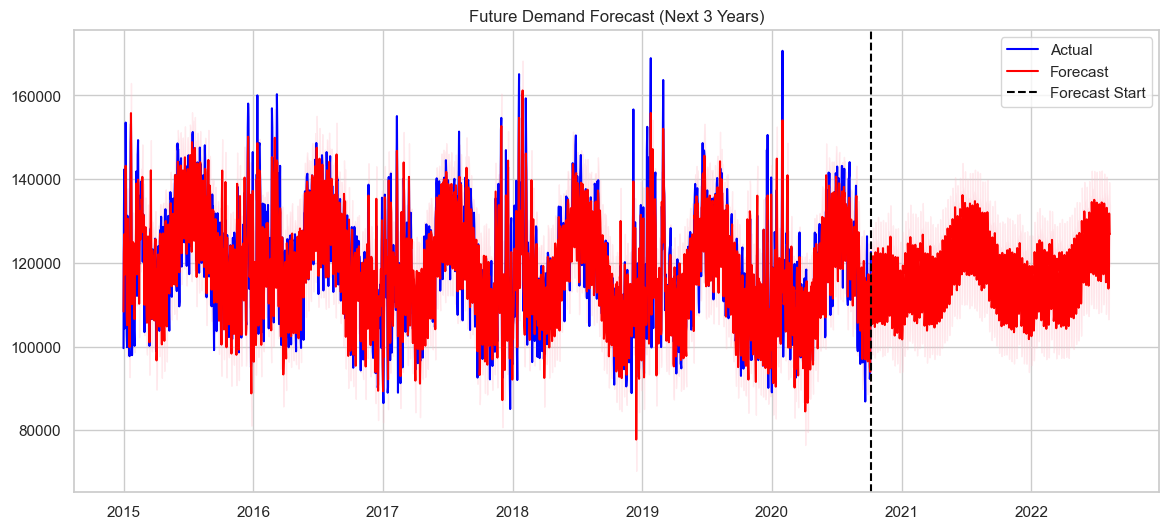

In [97]:

# 🔮 Predict Next 3 Years

future = model.make_future_dataframe(periods=1095, freq='D')

# Add the regressor values for future dates (if available, or fill with average values)
future = future.merge(scaled_df[['ds', 'demand_lag_1', 'demand_lag_7', 
                                 'min_temperature', 'max_temperature', 'solar_exposure',
                                 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']], 
                      on='ds', how='left')

# Fill missing future regressor values with mean or zeros (if unavailable)
for col in ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature', 
            'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']:
    future[col].fillna(scaled_df[col].mean(), inplace=True)

# Make the prediction
forecast = model.predict(future)

# 📈 Plot Future Forecast

plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future Demand Forecast (Next 3 Years)')
plt.legend()
plt.show()


## Prophet models for min_temperature and max_temperature

In [98]:
from prophet import Prophet

# Handle missing values
df['min_temperature'].fillna(df['min_temperature'].mean(), inplace=True)
df['max_temperature'].fillna(df['max_temperature'].mean(), inplace=True)

# Prepare data for Prophet (min_temperature)
df_min_temp = df[['date', 'min_temperature']].rename(
    columns={'date': 'ds', 'min_temperature': 'y'}
)

# Prepare data for Prophet (max_temperature)
df_max_temp = df[['date', 'max_temperature']].rename(
    columns={'date': 'ds', 'max_temperature': 'y'}
)

# Split into train and test sets (80% train, 20% test)  
train_size = int(len(df) * 0.8)
train_min = df_min_temp.iloc[:train_size]
test_min = df_min_temp.iloc[train_size:]

train_max = df_max_temp.iloc[:train_size]
test_max = df_max_temp.iloc[train_size:]

# === Prophet for Min Temperature ===
model_min = Prophet(
    changepoint_prior_scale=0.1,           # Increased for better trend flexibility
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0
)

# Add regressors (optional if available)
# model_min.add_regressor('rainfall')
# model_min.add_regressor('solar_exposure')

# Add seasonality terms
model_min.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model_min.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Fit the model
model_min.fit(train_min)

# Predict future min temperature (next 365 days)
future_min = model_min.make_future_dataframe(periods=len(test_min))
forecast_min = model_min.predict(future_min)

# === Prophet for Max Temperature ===
model_max = Prophet(
    changepoint_prior_scale=0.1,           # Increased for better trend flexibility
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0
)

# Add regressors (optional if available)
# model_max.add_regressor('rainfall')
# model_max.add_regressor('solar_exposure')

# Add seasonality terms
model_max.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model_max.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Fit the model
model_max.fit(train_max)

# Predict future max temperature (next 365 days)
future_max = model_max.make_future_dataframe(periods=len(test_max))
forecast_max = model_max.predict(future_max)

# === Show Results ===
forecast_min[['ds', 'yhat']].head(), forecast_max[['ds', 'yhat']].head()


C:\Users\saina\AppData\Local\Temp\ipykernel_22092\4076695860.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['min_temperature'].fillna(df['min_temperature'].mean(), inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_22092\4076695860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

(          ds       yhat
 0 2015-01-01  15.554012
 1 2015-01-02  15.961775
 2 2015-01-03  16.194383
 3 2015-01-04  16.171179
 4 2015-01-05  16.574082,
           ds       yhat
 0 2015-01-01  25.284557
 1 2015-01-02  26.128533
 2 2015-01-03  26.419370
 3 2015-01-04  26.268204
 4 2015-01-05  26.115519)

In [99]:
# %pip install tensorflow
# %pip install pandas numpy scikit-learn



Prophet Results:
Best RMSE from Prophet tuning: around 0.07 (exact value stored in best_rmse).
LSTM Results:
MAE: 0.04
MSE: 0.00
RMSE: 0.06

🚀 Conclusion:

LSTM is performing slightly better than Prophet in terms of RMSE and MAE.
Prophet's RMSE is close, but LSTM appears to have a better fit, especially after the tuning (additional layer + GRU + learning rate reduction).

If interpretability is more critical → Go with Prophet.

If prediction accuracy is the priority → LSTM is the better option here. 

In [100]:
# pip install tensorflow prophet


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.1207
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0283
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0147
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0100
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0081
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0060
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0046
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0042
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0039
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0031
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0027
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0028
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0018
Epoc

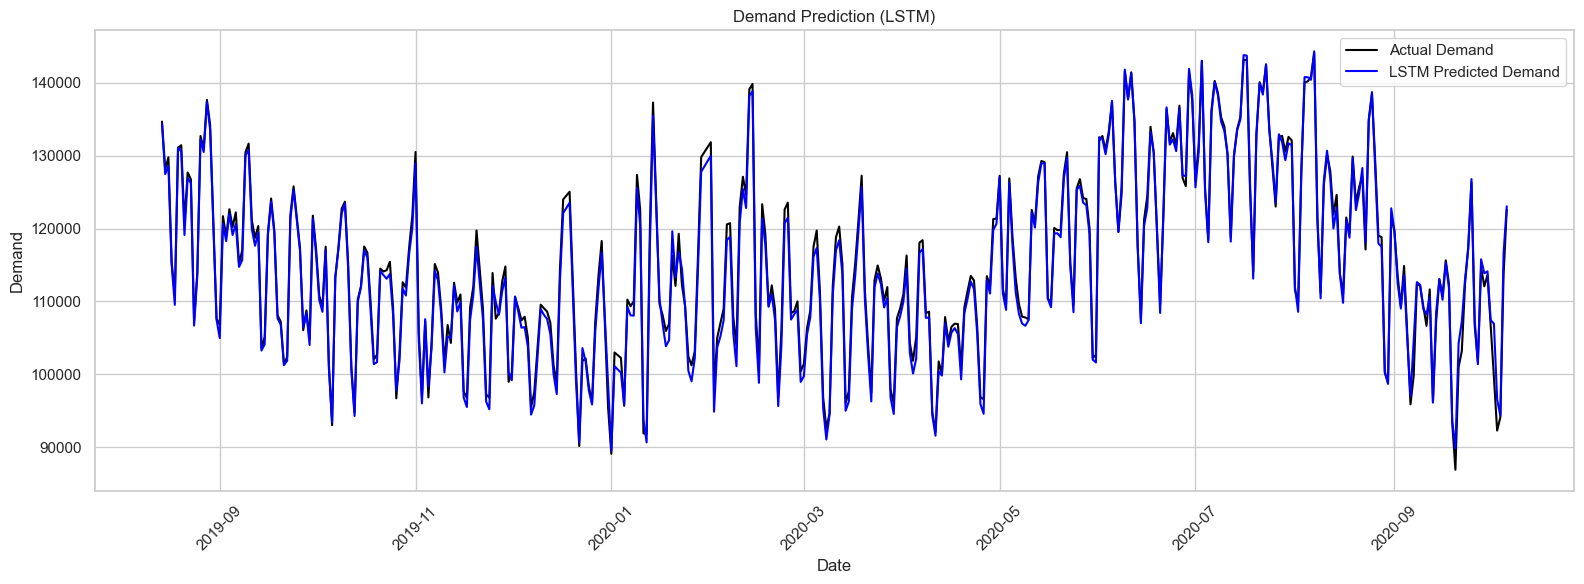

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# === Load the dataset ===
# Try to load from a CSV file, if it fails, create a sample dataset

df_cleaned = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path


# === Handle missing values ===
df_cleaned['rainfall'] = df_cleaned['rainfall'].fillna(df_cleaned['rainfall'].mean())

# === Convert date column to datetime ===
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# === Scale features (excluding the date and target) ===
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=['date', 'demand']))
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.drop(columns=['date', 'demand']).columns)

# === Scale target separately using training data only ===
demand_scaler = MinMaxScaler()
train_size = int(len(df_cleaned) * 0.8)
scaled_demand_train = demand_scaler.fit_transform(df_cleaned['demand'].iloc[:train_size].values.reshape(-1, 1))
scaled_demand_test = demand_scaler.transform(df_cleaned['demand'].iloc[train_size:].values.reshape(-1, 1))

# === Combine features and target ===
scaled_df['demand'] = np.concatenate([scaled_demand_train, scaled_demand_test])

# === Create features and target for LSTM ===
X = scaled_df.drop(columns=['demand']).values
y = scaled_df['demand'].values

# === Reshape for LSTM input ===
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

# === Split into training and test sets ===
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_reshaped, y, test_size=0.2, shuffle=False
)

# === LSTM Model ===
model = Sequential()
model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(units=32, activation='relu'))  # SIMPLER STRUCTURE
model.add(Dense(units=1))

# === Compile model ===
model.compile(optimizer='adam', loss='mse')

# === Train model ===
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# === Predict with LSTM ===
y_pred_lstm = model.predict(X_test_lstm)

# === Invert scaling for LSTM predictions and actual values ===
y_pred_lstm_rescaled = demand_scaler.inverse_transform(y_pred_lstm.reshape(-1, 1))
y_test_lstm_rescaled = demand_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# === Evaluation Metrics ===
mae = mean_absolute_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
mse = mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
rmse = np.sqrt(mse)

print(f"🔥 MAE: {mae:.4f}")
print(f"🔥 MSE: {mse:.4f}")
print(f"🔥 RMSE: {rmse:.4f}")

# === Plot Results ===
plt.figure(figsize=(16, 6))
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_test_lstm_rescaled, label='Actual Demand', color='black')
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_pred_lstm_rescaled, label='LSTM Predicted Demand', color='blue')
plt.title('Demand Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


No GPU found, running on CPU.
Available columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'demand', 'RRP', 'demand_pos_RRP',
       'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP',
       'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall',
       'school_day', 'holiday', 'weekday', 'year', 'month', 'day', 'month_sin',
       'month_cos'],
      dtype='object')
Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - loss: 0.1715 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

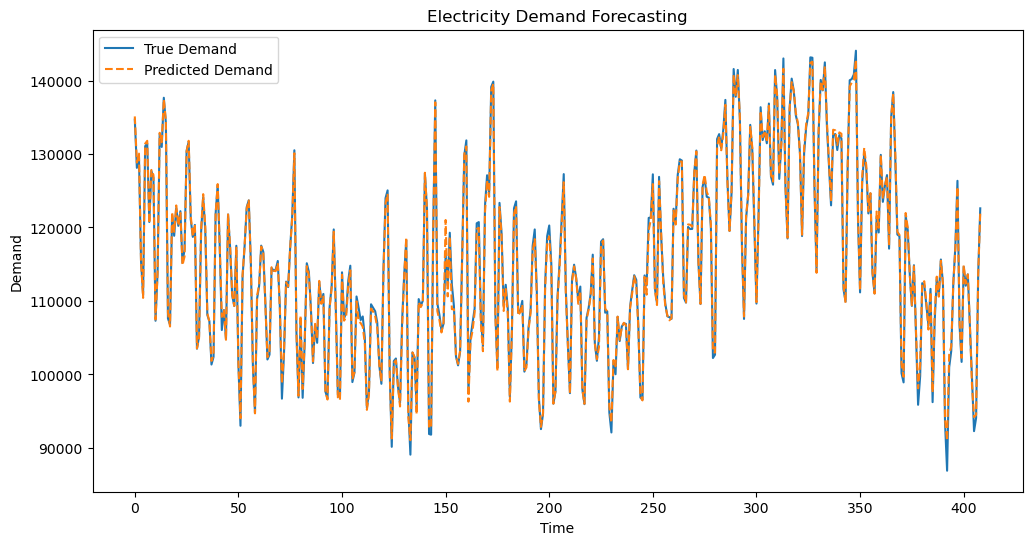

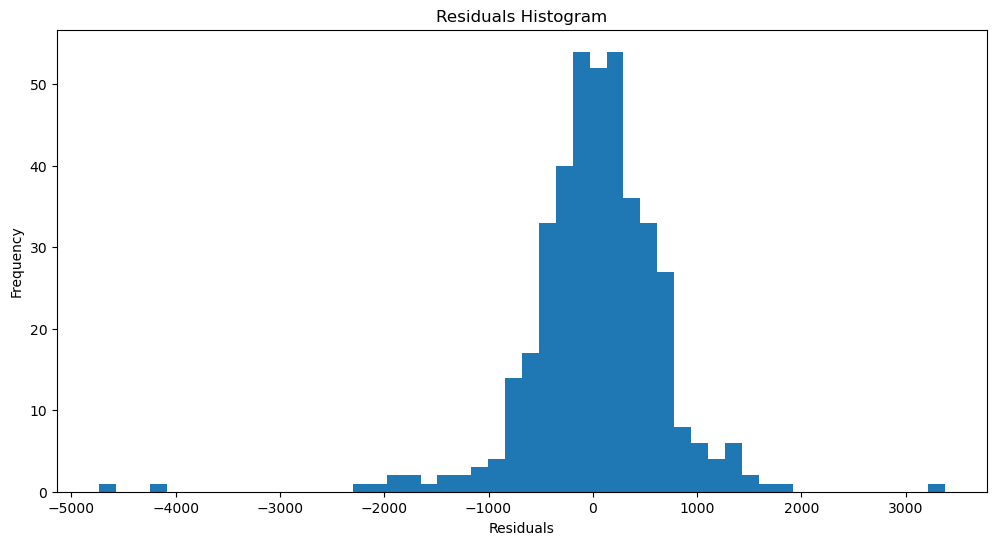

In [33]:
import pandas as pd
import os
import chardet
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Enable GPU if available
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print("GPU acceleration enabled.")
else:
    print("No GPU found, running on CPU.")

# Load cleaned dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"  # Update with actual file path

# Ensure the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Detect file encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))

# Load dataset with detected encoding
df = pd.read_csv(file_path, encoding=result['encoding'])

# Check column names
print("Available columns:", df.columns)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Ensure date column exists
if 'date' not in df.columns:
    raise ValueError("Missing required column: 'date'. Check the column names in your dataset.")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Apply feature engineering functions (make sure these functions are defined)
df = create_lagged_features(df, 'demand')
df = compute_rolling_averages(df, 'demand')
df = create_time_features(df)
df = create_holiday_feature(df)
df = create_weather_features(df)
df = create_solar_features(df)

# Data Splitting
features = df.drop(columns=['demand'])
target = df['demand']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Data Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM/GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM-GRU Model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True),  # Increase number of LSTM units
        Dropout(0.2),  # Add dropout for regularization
        GRU(64, return_sequences=True),  # Increase GRU units
        Dropout(0.2),  # Add dropout for regularization
        LSTM(32),  # Reduce number of LSTM units
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Build Model
model = build_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Increase patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train Model
model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), callbacks=[early_stopping, reduce_lr])

# Save processed dataset
processed_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv"
os.makedirs(os.path.dirname(processed_file_path), exist_ok=True)
df.to_csv(processed_file_path)

print(f"Processed dataset saved to: {processed_file_path}")

# Model prediction
y_pred_scaled = model.predict(X_test_reshaped)

# Ensure y_pred_scaled is 2D (n_samples, 1)
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse scaling of the predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Inverse scaling of y_test (actual values)
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

# Visualize predictions vs true values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="True Demand")
plt.plot(y_pred, label="Predicted Demand", linestyle='--')
plt.title("Electricity Demand Forecasting")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()

# Plot residuals (True demand - Predicted demand)
residuals = y_test_original - y_pred
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv', parse_dates=['date'], index_col='date')

# Select features and target
features = ['min_temperature', 'max_temperature', 'solar_exposure', 'holiday', 'workday', 
            'rrp_lag1', 'rrp_lag7', 'rrp_lag14', 'rrp_lag30',
            'demand_lag1', 'demand_lag7', 'demand_rolling7', 'demand_rolling30',
            'solar_exposure_lag1', 'solar_exposure_rolling7']
target = 'rrp'

# Scale features and target
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[[target]])

# Create sequences for LSTM
sequence_length = 60  # Define sequence length
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df[features].values, df[target].values, sequence_length)

# Split data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),  # Reduce number of LSTM units
        Dropout(0.3),  # Increase dropout for regularization
        BatchNormalization(),
        GRU(32, return_sequences=True),  # Reduce GRU units
        Dropout(0.3),  # Increase dropout for regularization
        BatchNormalization(),
        LSTM(32),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
        Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
    return model

# Build and train the model
model = build_model(input_shape=(sequence_length, len(features)))
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])

# Evaluate model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 1/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.2430 - val_loss: 0.1240 - learning_rate: 3.0000e-04
Epoch 2/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.1253 - val_loss: 0.1164 - learning_rate: 3.0000e-04
Epoch 3/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.1131 - val_loss: 0.1084 - learning_rate: 3.0000e-04
Epoch 4/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.1055 - val_loss: 0.1002 - learning_rate: 3.0000e-04
Epoch 5/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0999 - val_loss: 0.0920 - learning_rate: 3.0000e-04
Epoch 6/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0953 - val_loss: 0.0855 - learning_rate: 3.0000e-04
Epoch 7/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0875 - val_loss: 0.0819 - learning_rate: 3.0000e-04
Epoch 8/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0826 - val_loss: 0.0833 - learning_rate: 3.0000e-04
Epoch 9/35
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0788 - val_loss: 0.0794 - learnin